<a href="https://colab.research.google.com/github/mohmaed7777/Variable-Transformation-Feature-Engineering/blob/main/Udemy_Courses_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%pylab inline
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [6]:
# Load the Data : 
df = pd.read_csv('/content/udemy_output_All_Finance__Accounting_p1_p626.csv')
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509.0,4.66019,4.67874,4.67874,78006.0,False,84.0,0.0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070.0,4.58956,4.60015,4.60015,54581.0,False,78.0,0.0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282.0,4.59491,4.59326,4.59326,52653.0,False,292.0,2.0,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860.0,4.54407,4.53772,4.53772,46447.0,False,338.0,0.0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836.0,4.47080,4.47173,4.47173,41630.0,False,83.0,0.0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [7]:
df.shape

(9098, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9098 entries, 0 to 9097
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9098 non-null   int64  
 1   title                         9098 non-null   object 
 2   url                           9097 non-null   object 
 3   is_paid                       9097 non-null   object 
 4   num_subscribers               9097 non-null   float64
 5   avg_rating                    9097 non-null   float64
 6   avg_rating_recent             9097 non-null   float64
 7   rating                        9097 non-null   float64
 8   num_reviews                   9097 non-null   float64
 9   is_wishlisted                 9097 non-null   object 
 10  num_published_lectures        9097 non-null   float64
 11  num_published_practice_tests  9097 non-null   float64
 12  created                       9097 non-null   object 
 13  pub

In [9]:
df.columns.tolist()

['id',
 'title',
 'url',
 'is_paid',
 'num_subscribers',
 'avg_rating',
 'avg_rating_recent',
 'rating',
 'num_reviews',
 'is_wishlisted',
 'num_published_lectures',
 'num_published_practice_tests',
 'created',
 'published_time',
 'discount_price__amount',
 'discount_price__currency',
 'discount_price__price_string',
 'price_detail__amount',
 'price_detail__currency',
 'price_detail__price_string']

In [11]:
df.select_dtypes('number')

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
0,762616,295509.0,4.66019,4.67874,4.67874,78006.0,84.0,0.0,455.0,8640.0
1,937678,209070.0,4.58956,4.60015,4.60015,54581.0,78.0,0.0,455.0,8640.0
2,1361790,155282.0,4.59491,4.59326,4.59326,52653.0,292.0,2.0,455.0,8640.0
3,648826,245860.0,4.54407,4.53772,4.53772,46447.0,338.0,0.0,455.0,8640.0
4,637930,374836.0,4.47080,4.47173,4.47173,41630.0,83.0,0.0,455.0,8640.0
...,...,...,...,...,...,...,...,...,...,...
9093,1632060,193.0,4.37500,4.34402,4.34402,4.0,37.0,0.0,455.0,4480.0
9094,709650,10.0,4.12500,3.95878,3.95878,4.0,9.0,0.0,455.0,1920.0
9095,849632,37.0,4.50000,4.48685,4.48685,4.0,23.0,0.0,455.0,1280.0
9096,1471896,25.0,4.75000,4.73631,4.73631,4.0,28.0,0.0,455.0,1280.0


In [13]:
df.drop(['id'], axis=1, inplace=True)
df.head(2)

,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509.0,4.66019,4.67874,4.67874,78006.0,False,84.0,0.0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070.0,4.58956,4.60015,4.60015,54581.0,False,78.0,0.0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [14]:
df.isnull().sum()

title                             0
url                               1
is_paid                           1
num_subscribers                   1
avg_rating                        1
avg_rating_recent                 1
rating                            1
num_reviews                       1
is_wishlisted                     1
num_published_lectures            1
num_published_practice_tests      1
created                           1
published_time                    1
discount_price__amount          472
discount_price__currency        472
discount_price__price_string    472
price_detail__amount              1
price_detail__currency            1
price_detail__price_string        1
dtype: int64

In [17]:
df.fillna(0)
#df.select_dtypes('number')

,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509.0,4.66019,4.67874,4.67874,78006.0,False,84.0,0.0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070.0,4.58956,4.60015,4.60015,54581.0,False,78.0,0.0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282.0,4.59491,4.59326,4.59326,52653.0,False,292.0,2.0,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860.0,4.54407,4.53772,4.53772,46447.0,False,338.0,0.0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836.0,4.47080,4.47173,4.47173,41630.0,False,83.0,0.0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9093,Developing Promising Online Business Ideas,/course/developing-promising-online-business-i...,True,193.0,4.37500,4.34402,4.34402,4.0,False,37.0,0.0,2018-04-05T09:07:59Z,2018-04-11T12:07:34Z,455.0,INR,₹455,4480.0,INR,"₹4,480"
9094,Offline Marketing for an Online World,/course/offline-marketing-for-an-online-world/,True,10.0,4.12500,3.95878,3.95878,4.0,False,9.0,0.0,2015-12-29T13:48:40Z,2017-05-30T05:44:27Z,455.0,INR,₹455,1920.0,INR,"₹1,920"
9095,Write a Successful Business Grant Proposal,/course/write-a-successful-business-grant-prop...,True,37.0,4.50000,4.48685,4.48685,4.0,False,23.0,0.0,2016-05-15T07:35:32Z,2016-07-10T17:11:15Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
9096,MBA ASAP Powerful Negotiation Strategies for S...,/course/become-a-better-negotiator/,True,25.0,4.75000,4.73631,4.73631,4.0,False,28.0,0.0,2017-12-16T17:43:00Z,2018-01-02T19:09:19Z,455.0,INR,₹455,1280.0,INR,"₹1,280"


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_subscribers,9097.0,3520.004837,10631.296911,4.00000,168.00000,999.00000,3027.00000,374836.0
avg_rating,9097.0,4.141028,0.439981,1.80000,3.90000,4.20000,4.45000,5.0
avg_rating_recent,9097.0,4.128173,0.462224,1.36363,3.88286,4.20588,4.44395,5.0
rating,9097.0,4.128173,0.462224,1.36363,3.88286,4.20588,4.44395,5.0
num_reviews,9097.0,310.441684,1860.743274,4.00000,13.00000,35.00000,117.00000,78006.0
num_published_lectures,9097.0,34.854348,46.643934,0.00000,13.00000,23.00000,39.00000,699.0
num_published_practice_tests,9097.0,0.098164,0.568073,0.00000,0.00000,0.00000,0.00000,6.0
discount_price__amount,8626.0,489.639810,250.276515,455.00000,455.00000,455.00000,455.00000,3200.0
price_detail__amount,9097.0,4873.589095,3108.881999,1280.00000,1600.00000,4160.00000,8640.00000,12800.0


In [20]:
# Handling the missing Values : 
missing_data = df.isnull().sum()
missing_data[:10]

title                     0
url                       1
is_paid                   1
num_subscribers           1
avg_rating                1
avg_rating_recent         1
rating                    1
num_reviews               1
is_wishlisted             1
num_published_lectures    1
dtype: int64

In [21]:
# Get the percentage value of the missing data : 
total_cells = np.product(df.shape)
total_missings = missing_data.sum()

percent = (total_missings / total_cells) * 100
print(percent)

0.8278279783873842


In [22]:
# Create a copy of our original dataset : 
copied_data = df.copy()

In [25]:
# Log transformations : 
# Create a list of folat columns to check the skewing : 
num_cols = df.select_dtypes('number').columns 
skew_limit = 0.75 
skew_vals = df[num_cols].skew()
# showing the skewed columns :
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

num_reviews                     20.982280
num_subscribers                 14.250202
discount_price__amount           8.780064
num_published_practice_tests     7.389967
num_published_lectures           6.174932
avg_rating                      -0.980107
rating                          -1.076877
avg_rating_recent               -1.076877
dtype: float64

[Text(0, 0.5, 'frequncy'),
 Text(0.5, 0, 'value'),
 Text(0.5, 1.0, 'after np.log1p')]

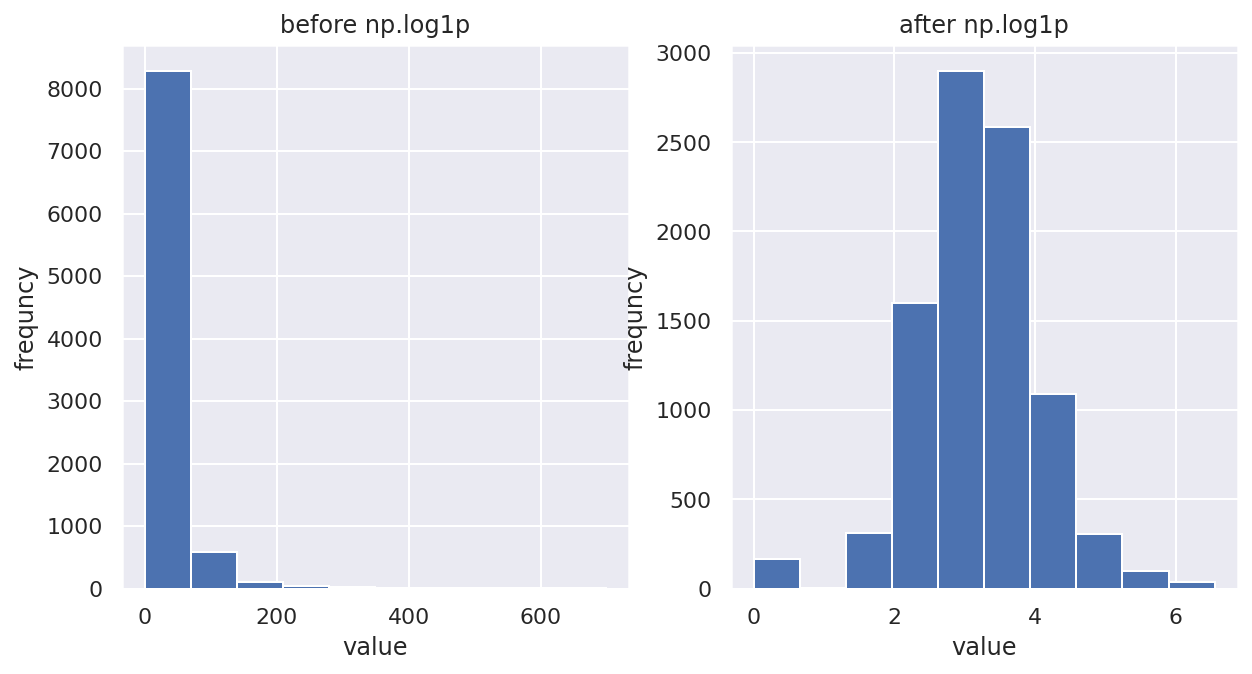

In [43]:
# Let's look at what happens to one of these features, when we apply np.log1p : 
# Choose the field: 
field = 'num_published_lectures'
# Create two subplots & figures using matplotlib pandas built-in version: 
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
# Create a histogram on the ax_before subplot :
df[field].hist(ax = ax_before)
#Apply a log tranformation(numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)
# Formatting of titles : 
ax_before.set(title='before np.log1p',
              ylabel='frequncy',
              xlabel='value')
ax_after.set(title='after np.log1p',
              ylabel='frequncy',
              xlabel='value')

In [45]:
# perform the skew transformation : 
for col in skew_cols.index.values: 
  if col == 'num_published_lectures':
    continue

  df[col] = df[col].apply(np.log1p)  


In [47]:
df.select_dtypes('number').columns

Index(['num_subscribers', 'avg_rating', 'avg_rating_recent', 'rating',
       'num_reviews', 'num_published_lectures', 'num_published_practice_tests',
       'discount_price__amount', 'price_detail__amount'],
      dtype='object')

In [48]:
df.isnull().sum()

title                             0
url                               1
is_paid                           1
num_subscribers                   1
avg_rating                        1
avg_rating_recent                 1
rating                            1
num_reviews                       1
is_wishlisted                     1
num_published_lectures            1
num_published_practice_tests      1
created                           1
published_time                    1
discount_price__amount          472
discount_price__currency        472
discount_price__price_string    472
price_detail__amount              1
price_detail__currency            1
price_detail__price_string        1
dtype: int64

In [51]:
smaller_df = df.loc[:,['num_subscribers', 'avg_rating', 'avg_rating_recent', 'rating',
       'num_reviews', 'num_published_lectures', 'num_published_practice_tests',
       'discount_price__amount', 'price_detail__amount']]
smaller_df.head()       

,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
0,12.596458,1.733457,1.736729,1.736729,11.264554,84.0,0.000000,6.122493,8640.0
1,12.250429,1.720901,1.722793,1.722793,10.907459,78.0,0.000000,6.122493,8640.0
2,11.953005,1.721857,1.721562,1.721562,10.871497,292.0,1.098612,6.122493,8640.0
3,12.412522,1.712729,1.711583,1.711583,10.746089,338.0,0.000000,6.122493,8640.0
4,12.834247,1.699425,1.699595,1.699595,10.636600,83.0,0.000000,6.122493,8640.0


In [52]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9098 entries, 0 to 9097
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_subscribers               9097 non-null   float64
 1   avg_rating                    9097 non-null   float64
 2   avg_rating_recent             9097 non-null   float64
 3   rating                        9097 non-null   float64
 4   num_reviews                   9097 non-null   float64
 5   num_published_lectures        9097 non-null   float64
 6   num_published_practice_tests  9097 non-null   float64
 7   discount_price__amount        8626 non-null   float64
 8   price_detail__amount          9097 non-null   float64
dtypes: float64(9)
memory usage: 639.8 KB


In [53]:
# There appears tobe one NA so we can filter all missing values with fillna(0) method : 
smaller_df = smaller_df.fillna(0)

In [54]:
# Check the dataframe after filltering it : 
smaller_df.isnull().sum()

num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
rating                          0
num_reviews                     0
num_published_lectures          0
num_published_practice_tests    0
discount_price__amount          0
price_detail__amount            0
dtype: int64

In [57]:
stats_df = smaller_df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean', '25%', '50%', '75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df

,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
mean,6.618266,1.633127,1.630137,1.630137,3.872842,34.850517,0.046738,5.836979,4873.053418
25%,5.129899,1.589235,1.585700,1.585700,2.639057,13.000000,0.000000,6.122493,1600.000000
50%,6.907755,1.648659,1.649784,1.649784,3.583519,23.000000,0.000000,6.122493,4160.000000
75%,8.015658,1.695616,1.694496,1.694496,4.770685,39.000000,0.000000,6.122493,8640.000000
range,12.834247,1.791759,1.791759,1.791759,11.264554,699.000000,1.945910,8.071219,12800.000000


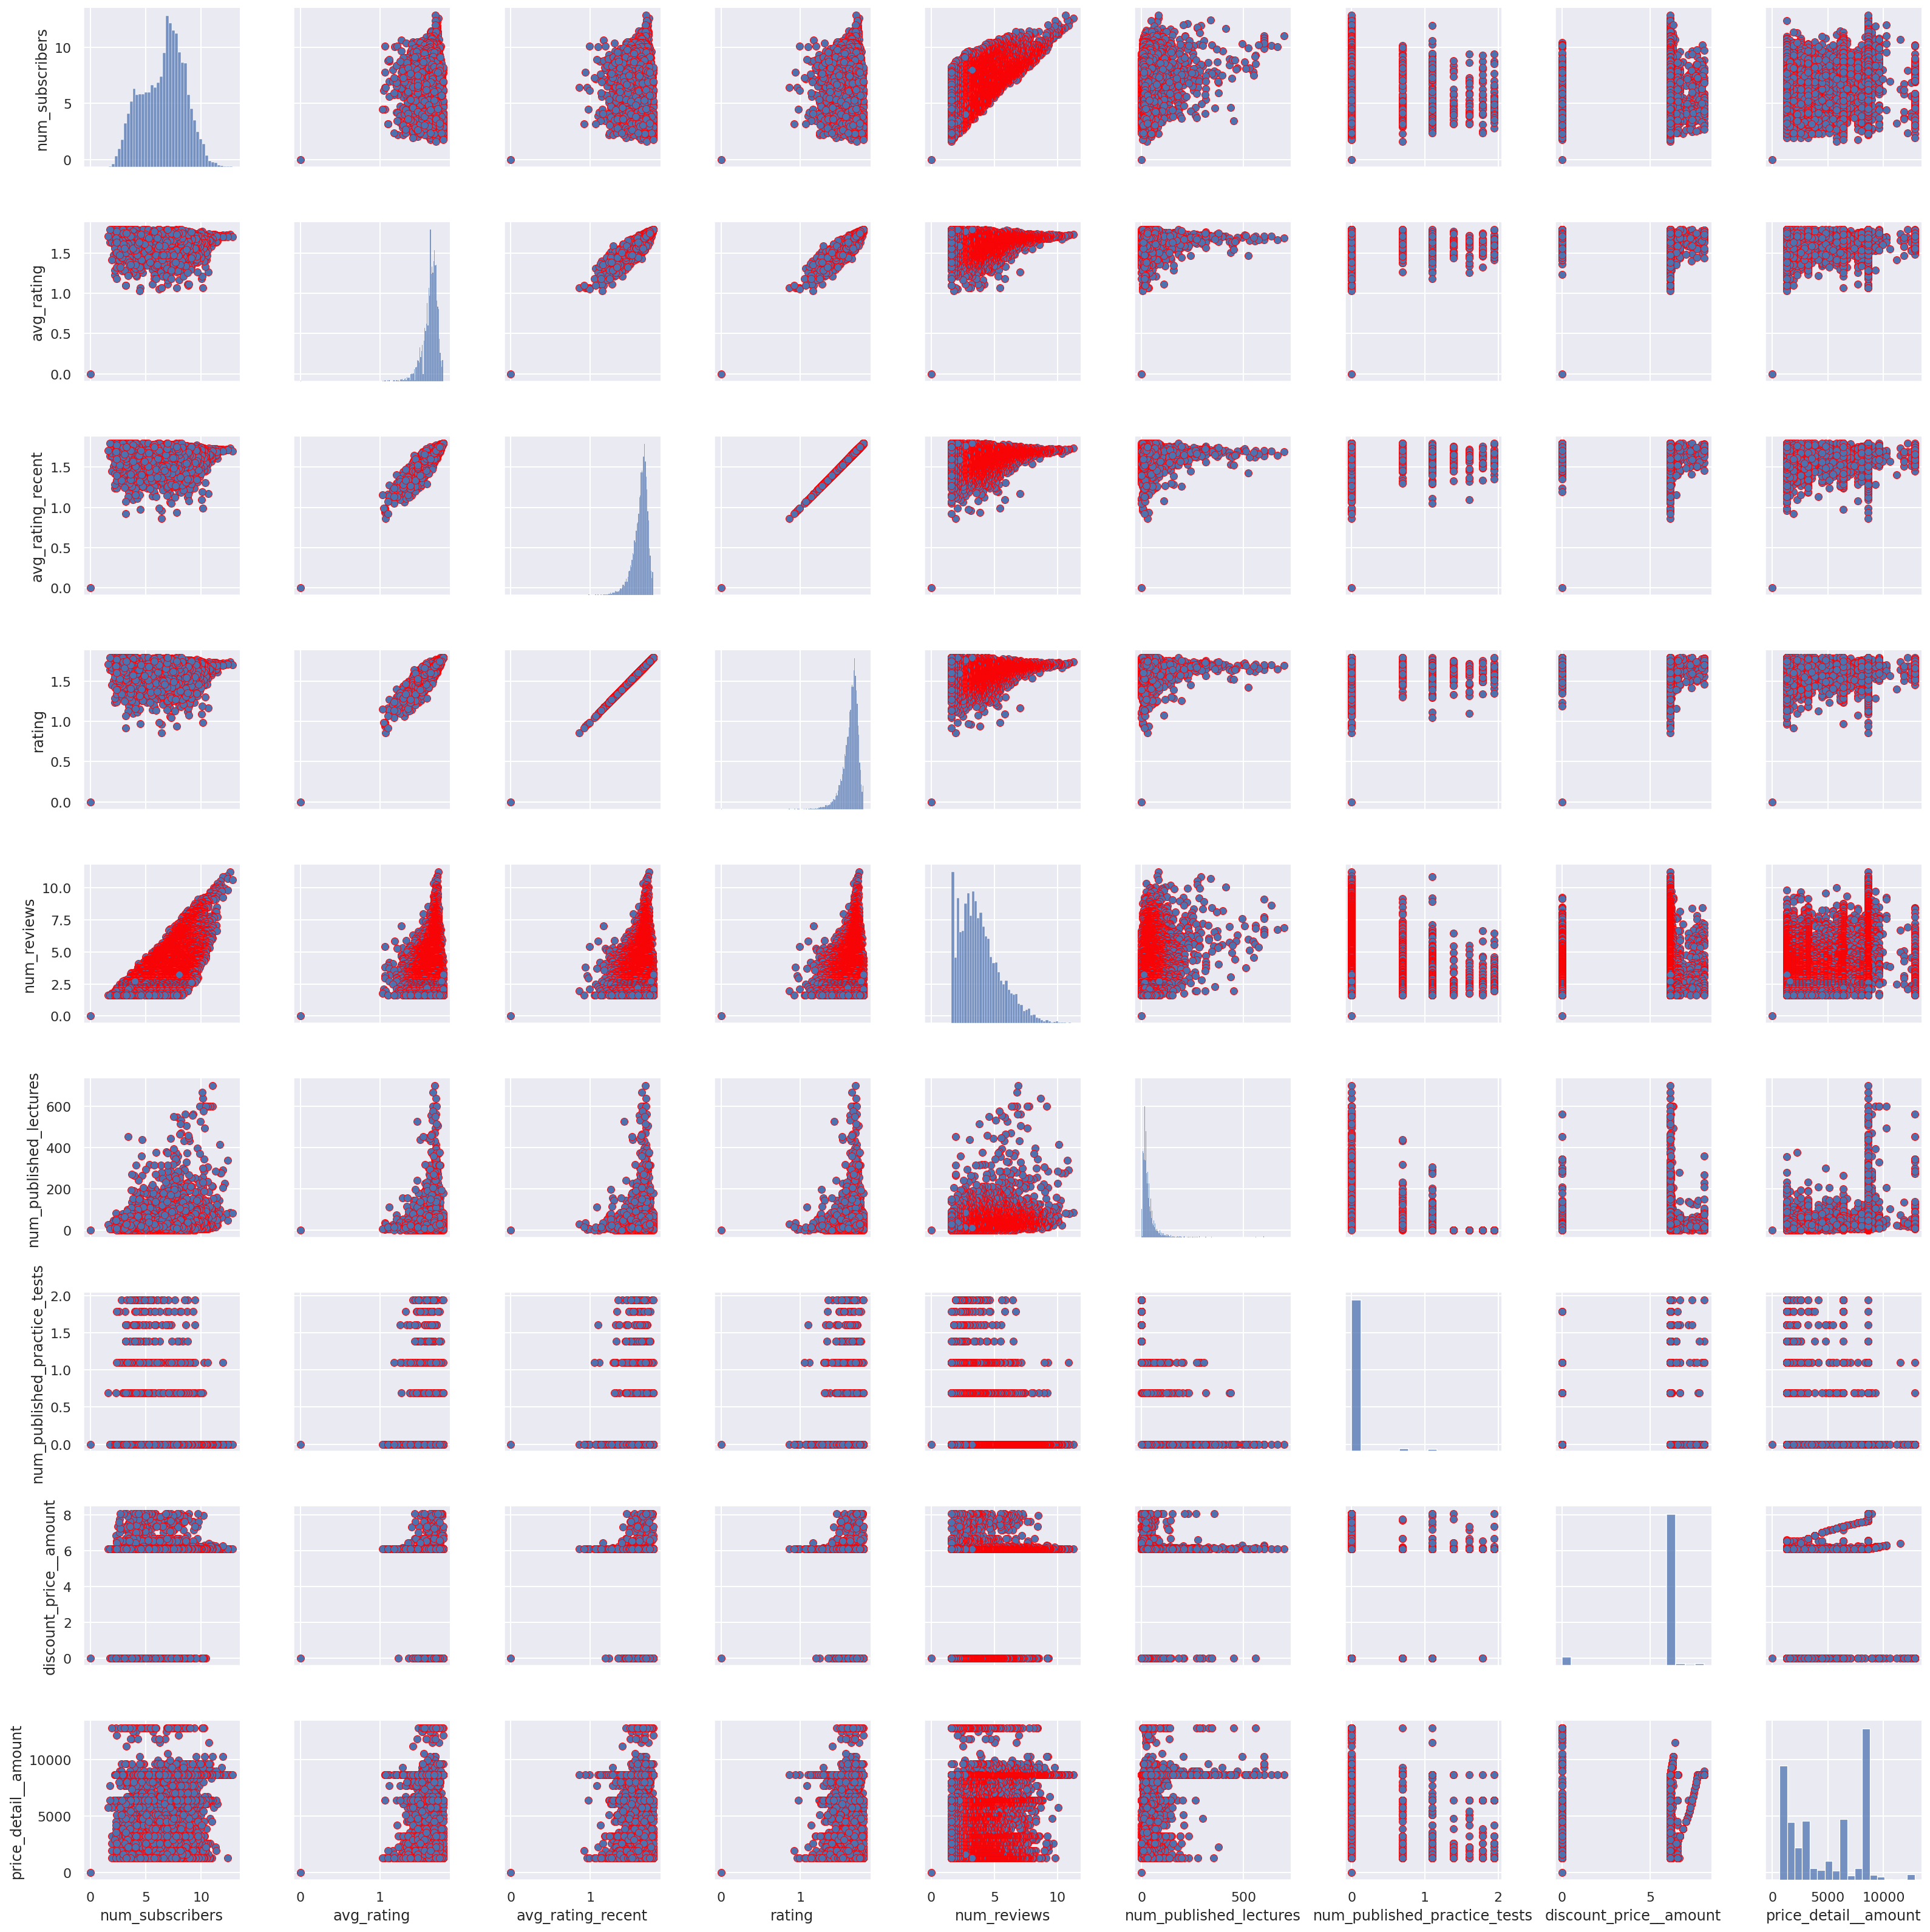

In [59]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=1, edgecolor='red'))